In [8]:
%matplotlib inline

In [1]:
def easy_draw():
    with open("simu.json",'r') as f:
        d = json.loads(f.read())
    dataset_num = d['dataset_num']
    method_num = d['method_num']
    iter_per_set = d['iter_per_set']
    dir_name = d['dir_name']
    data_src = d['data_src']
    marker = d['change_paras']
    title = d['title']
    
#     marker = ['cand=30','cand=60','cand=90','cand=120']
#     marker = ['k=10','k=20','k=30']
#     marker = ['cand=40','cand=42','cand=44']


    color = ['c','b','r','y','m','k']
    Results = np.zeros((dataset_num, method_num, iter_per_set))
    Stats = np.zeros((dataset_num, method_num, 2))#0 for mean, 1 for std

    for i in range(0, dataset_num):
        for j in range(0, iter_per_set):
            with open(dir_name+ '/' + data_src + '_' +
                      str(i) + '_' + str(j) + ".json",'r') as f:
                results = json.loads(f.read())
                for m in range(0, method_num):
                    Results[i,m,j] = results[m][0]
                    
    for i in range(0,dataset_num):
        for m in range(0, method_num):
            Stats[i,m,0] = np.mean(Results[i,m,:])
            Stats[i,m,1] = np.std(Results[i,m,:])

    print Stats[0,0,1]
    ind = np.arange(dataset_num)
    width = 0.2
    p_list = []
    for m in range(0, method_num):
        if method_num % 2 != 0:
            bias = np.floor(method_num/2)
        else:
            bias = (method_num - 1.0)/2
        p = plt.bar(ind + width*(m-bias), Stats[:,m,0], width=width, color=color[m], yerr=Stats[:,m,1])
        p_list.append(p)
            
    plt.xticks(ind, marker)
    plt.ylim(500,650)
    tup = tuple([p[0] for p in p_list])
    plt.legend(tup,("Greedy", "Noisy","Random"))
    plt.ylabel("Num of Covered Targets")
    plt.savefig(d['pic_name'])
    plt.show()

64


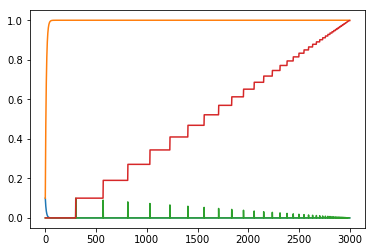

In [47]:
from matplotlib import pyplot as plt
def truncated_geo(p, N):
    x = np.arange(1,N+1)
    y = (1-p)**(x-1) * p
    y = y / np.sum(y)
    return y

N = 3000
y = truncated_geo(0.1,N)
cdf = np.cumsum(y) / np.sum(y)
remap = np.round(cdf * (N-1) + 1)
new_pdf = np.zeros((N,1))
for n, index in enumerate(remap):
    new_pdf[int(index)-1] = y[n]
plt.plot(y)
plt.plot(np.cumsum(y))
plt.plot(new_pdf)
plt.plot(np.cumsum(new_pdf))
print(len(np.where(new_pdf!=0)[0]))